In [1]:
import math

import sys
sys.path.append('../')
import nbimporter
from _11_Others import External_Condition as EC
from _11_Others import Solar_Radiation as SR

import matplotlib.pyplot as plt
%matplotlib inline

Importing Jupyter notebook from ..\_11_Others\External_Condition.ipynb
Importing Jupyter notebook from ..\_11_Others\Solar_Radiation.ipynb


# 第九章　自然エネルギー利用設備

## 第三節　空気集熱式太陽熱利用設備

### 5. 給湯部における補正集熱量

日付$d$における1日当たりの給湯部における補正集熱量$L_{sun,ass,d}$

$$
\begin{equation*}
    L_{sun,ass,d} = min \left( L_{tunk,d} , \: \left( L'_{k,d} + L'_{s,d} + L'_{w,d} + L'_{b1,d} + L'_{b2,d} + L'_{ba1,d} \right) \times f_{sr,uplim} \right)
\end{equation*}
$$

$f_{sr,uplim}$ : 給湯部の分担率上限値(-)   
$L_{sun,ass,d}$ : 日付$d$における1日当たりの給湯部における補正集熱量(MJ/日)  
$L_{tnk,d}$ : 日付$d$における1日当たりの給湯部におけるタンク蓄熱量の上限による補正集熱量(MJ/日)  
$L'_{k,d}$ : 日付$d$における1日当たりの台所水栓における節湯補正給湯熱負荷(MJ/日)  
$L'_{s,d}$ : 日付$d$における1日当たりの浴室シャワー水栓における節湯補正給湯熱負荷(MJ/日)  
$L'_{w,d}$ : 日付$d$における1日当たりの洗面水栓における節湯補正給湯熱負荷(MJ/日)  
$L'_{b1,d}$ : 日付$d$における1日当たりの浴槽水栓湯はり時における節湯補正給湯熱負荷(MJ/日)  
$L'_{b2,d}$ : 日付$d$における1日当たりの浴槽自動湯はり時における節湯補正給湯熱負荷(MJ/日)  
$L'_{ba1,d}$ : 日付$d$における1日当たりの浴槽水栓さし湯時における節湯補正給湯熱負荷(MJ/日)

給湯部の分担率上限値$f_{sr,uplim}$

$$
\begin{equation*}
    f_{sr,uplim} = 0.9
\end{equation*}
$$

In [2]:
def get_L_sun_ass(L_tnk, L_dash_s):
    f_sr_uplim = 0.9 # -
    return min(L_tnk, sum(L_dash_s) * f_sr_uplim)

日付$d$における1日当たりの給湯部におけるタンク蓄熱量の上限による補正集熱量$L_{tnk,d}$

$$
\begin{equation*}
   L_{tnk,d} = min \left( Q_{d} , \: HC_{tnk,d} \times \alpha_{tnk,d} \right)
\end{equation*}
$$

$L_{tnk,d}$ : 日付$d$における1日当たりの給湯部におけるタンク蓄熱量の上限による補正集熱量(MJ/日)  
$Q_{d}$ : 日付$d$における1日当たりの基準集熱量(MJ/日)  
$HC_{tnk,d}$ : 日付$d$における給湯部のタンク蓄熱量の上限(MJ)  
$\alpha_{tnk,d}$ : 日付$d$における給湯部のタンク有効利用率(1/日)  

日付$d$における給湯部のタンク有効利用率$\alpha_{tnk,d}$

$$
\begin{equation*}
    \alpha_{tnk,d} = 1.0
\end{equation*}
$$

In [3]:
def get_L_tnk(Q_d, HC_tnk):
    alpha_tnk = 1  # 1/day
    return min(Q_d, HC_tnk * alpha_tnk)

日付$d$における給湯部のタンク蓄熱量の上限$HC_{tnk,d}$

$$
\begin{equation*}
    HC_{tnk,d} = \left( \theta_{tnk} - \theta_{wtr,d} \right) \times W_{tnk} \times 10^{-3}
\end{equation*}
$$

$HC_{tnk,d}$ : 日付$d$における給湯部のタンク蓄熱量の上限(MJ)  
$\theta_{tnk}$ : 給湯部のタンク内温度(℃)   
$\theta_{wtr,d}$ : 日付$d$における日平均給水温度(℃)  
$W_{tnk}$ : 給湯部のタンク容量(L)  

給湯部のタンク内温度$\theta_{tnk}$

$$
\begin{equation*}
    \theta_{tnk} = 65
\end{equation*}
$$

In [4]:
def get_HC_tnk(theta_wtr, W_tnk):
    theta_tnk = 65  # degree C
    return (theta_tnk - theta_wtr) * W_tnk * 10**(-3)

#### Example

In [5]:
_HC_tnk = get_HC_tnk(theta_wtr = 4.575742333, W_tnk = 300)
_HC_tnk

18.127277300099998

In [6]:
_L_tnk = get_L_tnk(Q_d = 100.024, HC_tnk = _HC_tnk)
_L_tnk

18.127277300099998

In [7]:
get_L_sun_ass(L_tnk =_L_tnk, L_dash_s = [25.80175401, 33.36433708, 6.821153359, 26.69146967, 0.0, 4.831208333, 0.0])

18.127277300099998

### 6. 基準集熱量

日付$d$における1日当たりの基準集熱量$Q_{d}$

$$
\begin{equation*}
    Q_{d} = \sum_{t=0}^{23} \left( Q_{col,d,t} \times f_{hx} \times f_{s} \times t_{cp,d,t} \right)
\end{equation*}
$$

$f_{hx}$ : 給湯部の熱交換効率(-)  
$f_{s}$ : 給湯部のシステム効率(-)  
$Q_{d}$ : 日付$d$における1日当たりの基準集熱量(MJ/日)  
$Q_{col,d,t}$ : 日付$d$の時刻$t$における1時間当たりの集熱部における集熱量(MJ/h)   
$t_{cp,d,t}$ : 日付$d$の時刻$t$における1時間当たりの循環ポンプの稼働時間(h/h)   

給湯部の熱交換効率$f_{hx}$

$$
\begin{equation*}
    f_{hx} = 0.25
\end{equation*}
$$

給湯部のシステム効率$f_{s}$

$$
\begin{equation*}
    f_{s} = 0.85
\end{equation*}
$$

In [8]:
def get_Q_d(Q_col, t_cp):    
    f_hx = 0.25  # -
    f_s = 0.85   # -
    return Q_col * f_hx * f_s * t_cp

#### Example

In [9]:
get_Q_d(Q_col = 0.026268672, t_cp = 0.61)

0.0034050766079999997

### 7. 消費電力量

#### 7.1　補機の消費電力量

日付$d$における1日当たりの補機の消費電力量のうち給湯設備への付加分$E_{E,ass,aux,W,d}$

$$
\begin{equation*}
    E_{E,ass,aux,W,d} = \sum_{t=0}^{23} E_{E,ass,aux,W,d,t}
\end{equation*}
$$

$E_{E,ass,aux,W,d}$ : 日付$d$における1日当たりの補機の消費電力量のうち給湯設備への付加分(kWh/日)   
$E_{E,ass,aux,W,d,t}$ : 日付$d$の時刻$t$における1時間当たりの補機の消費電力量のうち給湯設備への付加分(kWh/h)   

日付$d$の時刻$t$における1時間当たりの補機の消費電力量のうち給湯設備への付加分$E_{E,ass,aux,W,d,t}$

$$
\begin{equation*}
    E_{E,ass,aux,W,d,t} = E_{E,fan,d,t} + E_{E,cp,d,t}
\end{equation*}
$$

$E_{E,ass,aux,W,d,t}$ : 日付$d$の時刻$t$における1時間当たりの補機の消費電力量のうち給湯設備への付加分(kWh/h)   
$E_{E,cp,d,t}$ : 日付$d$の時刻$t$における1時間当たりの循環ポンプの消費電力量(kWh/h)   
$E_{E,fan,d,t}$ : 日付$d$の時刻$t$における1時間当たりの空気搬送ファンの消費電力量(kWh/h)   

In [10]:
def get_E_E_ass_aux_W(E_E_fan, E_E_cp):    
    return E_E_fan + E_E_cp

#### 7.2　空気搬送ファンの消費電力量

日付$d$における1日当たりの空気搬送ファンの消費電力量$E_{E,fan,d,t}$

<p style="text-indent:2em">空気搬送ファンの自立運転用太陽光発電装置を採用する場合：</p>  
$$ 
\begin{equation*}
    E_{E,fan,d,t} =0
\end{equation*}
$$

<p style="text-indent:2em">空気搬送ファンの自立運転用太陽光発電装置を採用しない場合：</p> 
<p style="text-indent:4em">$t_{cp,d,t} = 0$の場合（循環ポンプが稼働していない場合）：</p> 
$$ 
\begin{equation*}
    E_{E,fan,d,t} = 0
\end{equation*}
$$

<p style="text-indent:4em">$0 < t_{cp,d,t}$の場合（循環ポンプが稼働している場合）：</p> 
$$ 
\begin{equation*}
    E_{E,fan,d,t} =f_{SFP} \times V_{fan,d,t} \times 10^{-3}
\end{equation*}
$$

$E_{E,fan,d,t}$ : 日付$d$の時刻$t$における1時間当たりの空気搬送ファンの消費電力量(kWh/h)  
$f_{SFP}$ : 空気搬送ファンの比消費電力(W/(m<sup>3</sup>/h))  
$t_{cp,d,t}$ : 日付$d$の時刻$t$における1時間当たりの循環ポンプの稼働時間(h/h)  
$V_{fan,d,t}$ : 日付$d$の時刻$t$における1時間当たりの空気搬送ファンの風量(m<sup>3</sup>/h)  

空気搬送ファンの比消費電力$f_{SFP}$

<table>
    <caption>表3 空気搬送ファンの比消費電力$f_{SFP}$</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; text-align:center; border:1px solid black;">ファンの種別</th>
            <th style="text-align:center; text-align:center; border:1px solid black;">ファンの比消費電力$f_{SFP}$<br/>(W/(m<sup>3</sup>/h))</th>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td style="border:1px solid black; text-align:center;">ACファン</td>
            <td style="border:1px solid black; text-align:center;">0.4</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">DCファン</td>
            <td style="border:1px solid black; text-align:center;">0.2</td>
        </tr>
    </tbody> 
<table>

In [11]:
def get_f_SFP(Fan_Type):
    return {'AC' : 0.4, 'DC' : 0.2}[Fan_Type]

In [12]:
def get_E_E_fan(t_cp, V_fan, PV_for_Fan, Fan_Type):
    if PV_for_Fan is True:
        return 0
    elif PV_for_Fan is False:
        if t_cp == 0:
            return 0
        else:
            f_SFP = get_f_SFP(Fan_Type)  # W/(m3/h)
            return f_SFP * V_fan * 10**(-3)
    else:
        raise Exeption

#### 7.3　循環ポンプの消費電力量

日付$d$の時刻$t$における1時間当たりの循環ポンプの消費電力量$E_{E,cp,d,t}$

$$
\begin{equation*}
    E_{E,cp,d,t} = P_{cp} \times t_{cp,d,t} \times 10^{-3}
\end{equation*}
$$

$E_{E,cp,d,t}$ : 日付$d$の時刻$t$における1時間当たりの循環ポンプの消費電力量(kWh/h)   
$P_{cp}$ : 循環ポンプの消費電力(W)   
$t_{cp,d,t}$ : 日付$d$の時刻$t$における1時間当たりの循環ポンプの稼働時間(h/h)  

循環ポンプの消費電力$P_{cp}$

<table>
    <caption>表4 循環ポンプの消費電力$P_{cp}$</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; text-align:center; border:1px solid black;">循環ポンプの自立運転用太陽光発電装置の採用の有無</th>
            <th style="text-align:center; text-align:center; border:1px solid black;">循環ポンプの消費電力$P_{cp}$<br/>(W)</th>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td style="border:1px solid black; text-align:center;">採用しない</td>
            <td style="border:1px solid black; text-align:center;">80</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">採用する</td>
            <td style="border:1px solid black; text-align:center;">0</td>
        </tr>
    </tbody> 
<table>

In [13]:
def get_P_cp(PV_for_Pump):
    return {False : 80, True : 0}[PV_for_Pump]

In [14]:
def get_E_E_pump(t_cp, PV_for_Pump):
    P_cp = get_P_cp(PV_for_Pump)  # W
    return P_cp * t_cp * 10**(-3)

#### Example

In [15]:
_E_E_fan = get_E_E_fan(t_cp = 0.61, V_fan = 720, PV_for_Fan = False, Fan_Type = 'AC')
_E_E_fan

0.28800000000000003

In [16]:
_E_E_pump = get_E_E_pump(t_cp = 0.61, PV_for_Pump = False)
_E_E_pump

0.048799999999999996

In [17]:
get_E_E_ass_aux_W(E_E_fan = _E_E_fan, E_E_cp = _E_E_pump)

0.33680000000000004

### 8. 空気搬送ファンおよび循環ポンプ

#### 8.1　空気搬送ファンの稼働時間

日付$d$の時刻$t$における1時間当たりの空気搬送ファンの稼働時間$t_{fan,d,t}$  

<p style="text-indent:2em">$30 \leq \theta_{col,nonopg,d,t}$ かつ $25 < \theta_{col,opg,d,t}$の場合：</p> 
$$ 
\begin{equation*}
   t_{fan,d,t} = 1
\end{equation*}
$$

<p style="text-indent:2em">$\theta_{col,nonopg,d,t} < 30$ または $\theta_{col,opg,d,t} \leq 25$の場合：</p> 
$$ 
\begin{equation*}
   t_{fan,d,t} = 0
\end{equation*}
$$

$t_{fan,d,t}$ : 日付$d$の時刻$t$における1時間当たりの空気搬送ファンの稼働時間(h/h)  
$\theta_{col,opg,d,t}$ : 日付$d$の時刻$t$における空気搬送ファン稼働時の集熱部の出口における空気温度(℃)  
$\theta_{col,nonopg,d,t}$ : 日付$d$の時刻$t$における空気搬送ファン停止時の集熱部の出口における空気温度(℃)  

In [18]:
def get_t_fan(theta_col_opg, theta_col_nonopg):
    if 30 <= theta_col_nonopg and 25 < theta_col_opg:
        return 1
    elif theta_col_nonopg < 30 or theta_col_opg <= 25:
        return 0
    else:
        raise Exception

#### 8.2　循環ポンプの稼働時間

日付$d$の時刻$t$における1時間当たりの循環ポンプの稼働時間$t_{cp,d,t}$

<p style="text-indent:2em">$0 < t_{fan,d,t}$の場合：</p> 
$$ 
\begin{equation*}
   t_{cp,d,t} = 1 \times r_{cp}
\end{equation*}
$$

<p style="text-indent:2em">$t_{fan,d,t} = 0$の場合：</p> 
$$ 
\begin{equation*}
   t_{cp,d,t} = 0
\end{equation*}
$$

$r_{cp}$ : 循環ポンプの変平均稼働率(-)  
$t_{cp,d,t}$ : 日付$d$の時刻$t$における1時間当たりの循環ポンプの稼働時間(h/h)  
$t_{fan,d,t}$ : 日付$d$の時刻$t$における1時間当たりの空気搬送ファンの稼働時間(h/h)  

 循環ポンプの変平均稼働率（暖房運転と循環ポンプの稼働が同時に発生しないことを考慮するための係数）$r_{cp}$ 

<table>
    <caption>表4 循環ポンプの消費電力$P_{cp}$</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; text-align:center; border:1px solid black;" rowspan=2 >地域区分</th>
            <th style="text-align:center; text-align:center; border:1px solid black;" colspan=5>年間日射量地域区分</th>
        </tr>
        <tr>
            <th style="text-align:center; text-align:center; border:1px solid black;">A1</th>
            <th style="text-align:center; text-align:center; border:1px solid black;">A2</th>
            <th style="text-align:center; text-align:center; border:1px solid black;">A3</th>
            <th style="text-align:center; text-align:center; border:1px solid black;">A4</th>
            <th style="text-align:center; text-align:center; border:1px solid black;">A5</th>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td style="border:1px solid black; text-align:center;">1</td>
            <td style="border:1px solid black; text-align:center;">0.41</td>
            <td style="border:1px solid black; text-align:center;">0.33</td>
            <td style="border:1px solid black; text-align:center;">0.32</td>
            <td style="border:1px solid black; text-align:center;">-</td>
            <td style="border:1px solid black; text-align:center;">-</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">2</td>
            <td style="border:1px solid black; text-align:center;">0.37</td>
            <td style="border:1px solid black; text-align:center;">0.44</td>
            <td style="border:1px solid black; text-align:center;">0.40</td>
            <td style="border:1px solid black; text-align:center;">-</td>
            <td style="border:1px solid black; text-align:center;">-</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">3</td>
            <td style="border:1px solid black; text-align:center;">0.44</td>
            <td style="border:1px solid black; text-align:center;">0.40</td>
            <td style="border:1px solid black; text-align:center;">0.35</td>
            <td style="border:1px solid black; text-align:center;">0.36</td>
            <td style="border:1px solid black; text-align:center;">0.39</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">4</td>
            <td style="border:1px solid black; text-align:center;">0.40</td>
            <td style="border:1px solid black; text-align:center;">0.45</td>
            <td style="border:1px solid black; text-align:center;">0.45</td>
            <td style="border:1px solid black; text-align:center;">0.39</td>
            <td style="border:1px solid black; text-align:center;">0.41</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">5</td>
            <td style="border:1px solid black; text-align:center;">0.50</td>
            <td style="border:1px solid black; text-align:center;">0.50</td>
            <td style="border:1px solid black; text-align:center;">0.53</td>
            <td style="border:1px solid black; text-align:center;">0.50</td>
            <td style="border:1px solid black; text-align:center;">0.47</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">6</td>
            <td style="border:1px solid black; text-align:center;">-</td>
            <td style="border:1px solid black; text-align:center;">0.67</td>
            <td style="border:1px solid black; text-align:center;">0.64</td>
            <td style="border:1px solid black; text-align:center;">0.62</td>
            <td style="border:1px solid black; text-align:center;">0.61</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">7</td>
            <td style="border:1px solid black; text-align:center;">0.78</td>
            <td style="border:1px solid black; text-align:center;">0.78</td>
            <td style="border:1px solid black; text-align:center;">0.78</td>
            <td style="border:1px solid black; text-align:center;">0.71</td>
            <td style="border:1px solid black; text-align:center;">0.74</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">8</td>
            <td style="border:1px solid black; text-align:center;">-</td>
            <td style="border:1px solid black; text-align:center;">-</td>
            <td style="border:1px solid black; text-align:center;">1.00</td>
            <td style="border:1px solid black; text-align:center;">1.00</td>
            <td style="border:1px solid black; text-align:center;">1.00</td>
        </tr>
    </tbody> 
<table>

In [19]:
def get_r_cp(region, region_solar):
    return {
        'Region1' : {'A1' : 0.41, 'A2' : 0.33, 'A3' : 0.32, 'A4' : None, 'A5' : None},
        'Region2' : {'A1' : 0.37, 'A2' : 0.44, 'A3' : 0.40, 'A4' : None, 'A5' : None},
        'Region3' : {'A1' : 0.44, 'A2' : 0.40, 'A3' : 0.35, 'A4' : 0.36, 'A5' : 0.39},
        'Region4' : {'A1' : 0.40, 'A2' : 0.45, 'A3' : 0.45, 'A4' : 0.39, 'A5' : 0.41},
        'Region5' : {'A1' : 0.50, 'A2' : 0.50, 'A3' : 0.53, 'A4' : 0.50, 'A5' : 0.47},
        'Region6' : {'A1' : None, 'A2' : 0.67, 'A3' : 0.64, 'A4' : 0.62, 'A5' : 0.61},
        'Region7' : {'A1' : 0.78, 'A2' : 0.78, 'A3' : 0.78, 'A4' : 0.71, 'A5' : 0.74},
        'Region8' : {'A1' : None, 'A2' : None, 'A3' : 1.00, 'A4' : 1.00, 'A5' : 1.00}
    }[region][region_solar]

In [20]:
def get_t_cp(t_fan, region, region_solar):
    if 0 < t_fan:
        r_cp = get_r_cp(region, region_solar)
        if r_cp is None:
            raise Exception('Solar system can\'t be applied in this region' )
        else:
            return 1 * r_cp
    elif t_fan == 0:
        return 0
    else:
        raise Exeption

#### 8.3　空気搬送ファンの風量

日付$d$の時刻$t$における1時間当たりの空気搬送ファンの風量$V_{fan,d,t}$

$$ 
\begin{equation*}
   V_{fan,d,t} = V_{fan,P0} \times t_{fan,d,t}
\end{equation*}
$$

$t_{fan,d,t}$ : 日付$d$の時刻$t$における1時間当たりの空気搬送ファンの稼働時間(h/h)  
$V_{fan,d,t}$ : 日付$d$の時刻$t$における1時間当たりの空気搬送ファンの風量(m<sup>3</sup>/h)  
$V_{fan,P0}$ : 空気搬送ファンの送風機特性曲線において機外静圧をゼロとした時の空気搬送ファンの風量(m<sup>3</sup>/h)  

In [21]:
def get_V_fan(t_fan, V_fan_P0):
    return V_fan_P0 * t_fan

#### Example

In [22]:
_t_fan = get_t_fan(theta_col_opg = 31.06, theta_col_nonopg = 53.64)
_t_fan

1

In [23]:
get_t_cp(t_fan = _t_fan, region = 'Region6', region_solar = 'A5')

0.61

In [24]:
get_V_fan(t_fan = _t_fan, V_fan_P0 = 720)

720

### 9. 集熱部

#### 9.1　集熱量

日付$d$の時刻$t$における1時間当たりの集熱部における集熱量$Q_{col,d,t}$

$$ 
\begin{equation*}
   Q_{col,d,t} = \rho_{air} \times c_{P_{air}} \times V_{fan,d,t} \times \left( \theta_{col,opg,d,t} - \theta_{ex,d,t} \right) \times 10^{-3}
\end{equation*}
$$

$c_{P_{air}}$ : 空気の比熱(kJ/(kg$\cdot$K))  
$Q_{col,d,t}$ : 空日付$d$の時刻$t$における1時間当たりの集熱部における集熱量(MJ/h)  
$V_{fan,d,t}$ : 日付$d$の時刻$t$における1時間当たりの空気搬送ファンの風量(m<sup>3</sup>/h)  
$\theta_{col,opg,d,t}$ : 日付$d$の時刻$t$における空気搬送ファン稼働時の集熱部の出口における空気温度(℃)  
$\theta_{ex,d,t}$ : 日付$d$の時刻$t$における外気温度(℃)  
$\rho_{air}$ : 空気の密度(kg/m<sup>3</sup>)  

空気の密度$\rho_{air}$

$$ 
\begin{equation*}
   \rho_{air} = 1.2
\end{equation*}
$$

空気の比熱$c_{P_{air}}$

$$ 
\begin{equation*}
   c_{P_{air}} = 1.006
\end{equation*}
$$

In [25]:
def get_Q_col(V_fan, theta_col_opg, theta_ex):
    rho_air = 1.2    # kg/m3
    c_P_air = 1.006  # kJ/(kg K)
    return rho_air * c_P_air * V_fan * (theta_col_opg - theta_ex) *10**(-3)

#### 9.2　空気搬送ファン停止時の集熱部の出口における空気温度

日付$d$の時刻$t$における空気搬送ファン停止時の集熱部の出口における空気温度$\theta_{col,nonopg,d,t}$

$$ 
\begin{equation*}
   \theta_{col,nonopg,d,t} = \frac{\displaystyle \sum_{j=1}^{n} \left( \theta_{col,nonopg,j,d,t} \times V_{col,j,d,t} \right)}{\displaystyle \sum_{j=1}^{n} V_{col,j,d,t}}
\end{equation*}
$$

$n$ : 集熱器群の数(-)  
$V_{col,j,d,t}$ : 日付$d$の時刻$t$における空気集熱ファン稼働時に集熱器群$j$を流れる空気の体積流量(m<sup>3</sup>/h)  
$\theta_{col,nonopg,d,t}$ : 日付$d$の時刻$t$における空気搬送ファン停止時の集熱部の出口における空気温度(℃)  
$\theta_{col,nonopg,j,d,t}$ : 日付$d$の時刻$t$における空気搬送ファン停止時の集熱器群$j$の出口における空気温度(℃)  

In [26]:
def get_theta_col_nonopg(theta_col_nonopg_s, V_col_s, n_col):
    return sum(theta_col_nonopg_s[j1] * V_col_s[j1] for j1 in range(0,n_col,1)) / sum(V_col_s[j2] for j2 in range(0,n_col,1))

#### 9.3　空気搬送ファン稼働時の集熱部の出口における空気温度

日付$d$の時刻$t$における空気搬送ファン稼働時の集熱部の出口における空気温度$\theta_{col,opg,d,t}$

$$ 
\begin{equation*}
   \theta_{col,opg,d,t} = \frac{\displaystyle \sum_{j=1}^{n} \left( \theta_{col,opg,j,d,t} \times V_{col,j,d,t} \right)}{\displaystyle \sum_{j=1}^{n} V_{col,j,d,t}}
\end{equation*}
$$

$n$ : 集熱器群の数(-)  
$V_{col,j,d,t}$ : 日付$d$の時刻$t$における空気集熱ファン稼働時に集熱器群$j$を流れる空気の体積流量(-)  
$\theta_{col,opg,d,t}$ : 日付$d$の時刻$t$における空気搬送ファン稼働時の集熱部の出口における空気温度(℃)  
$\theta_{col,opg,j,d,t}$ : 日付$d$の時刻$t$における空気搬送ファン稼働時の集熱器群$j$の出口における空気温度(℃)  

In [27]:
def get_theta_col_opg(theta_col_opg_s, V_col_s, n_col):
    return sum(theta_col_opg_s[j] * V_col_s[j] for j in range(0,n_col,1)) / sum(V_col_s[j] for j in range(0,n_col,1))

#### 9.4　空気搬送ファン停止時の集熱器群の出口における空気温度

日付$d$の時刻$t$における空気搬送ファン停止時の集熱器群$j$の出口における空気温度$\theta_{col,nonopg,j,d,t}$

$$ 
\begin{equation*}
   \theta_{col,nonopg,j,d,t} = \frac{d_{0,j}}{d_{1,j}} \times I_{s,j,d,t} + \theta_{ex,d,t}
\end{equation*}
$$

$d_{0,j}$ : 集熱器群$j$を構成する集熱器の集熱効率特性線図一次近似式の切片(-)  
$d_{1,j}$ : 集熱器群$j$を構成する集熱器の集熱効率特性線図一次近似式の傾き(W/(m<sup>2</sup>$\cdot$K))  
$I_{s,j,d,t}$ : 日付$d$の時刻$t$における集熱器群$j$の単位面積当たりの平均日射量(W/m<sup>2</sup>)  
$\theta_{ex,d,t}$ : 日付$d$の時刻$t$における外気温度(℃)  
$\theta_{col,nonopg,j,d,t}$ : 日付$d$の時刻$t$における空気搬送ファン停止時の集熱器群$j$の出口における空気温度(℃)  

In [28]:
def get_theta_col_nonopg_j(I_s, theta_ex, d_0, d_1):
    return d_0 / d_1 * I_s + theta_ex

#### 9.5　空気搬送ファン稼働時の集熱器群の出口における空気温度

日付$d$の時刻$t$における空気搬送ファン稼働時の集熱器群$j$の出口における空気温度$\theta_{col,opg,j,d,t}$

$$ 
\begin{equation*}
   \theta_{col,opg,j,d,t} = \theta_{col,nonopg,j,d,t} + \left( \theta_{ex,d,t} - \theta_{col,nonopg,j,d,t} \right) \times e^{- \frac{U_{c,j} \times A_{j}}{c_{P_{air}} \times \rho_{air} \times V_{col,j,d,t} \div 3600 \times 10^{3}}}
\end{equation*}
$$

$A_{j}$ : 集熱器群$j$の面積(m<sup>2</sup>)  
$c_{P_{air}}$ : 空気の比熱(kJ/(kg$\cdot$K))  
$U_{c,j}$ : 集熱器群$j$を構成する集熱器の集熱器総合熱損失係数(W/(m<sup>2</sup>$\cdot$K))  
$V_{col,j,d,t}$ : 日付$d$の時刻$t$における空気集熱ファン稼働時に集熱器群$j$を流れる空気の体積流量(m<sup>3</sup>/h)  
$\theta_{col,opg,d,t}$ : 日付$d$の時刻$t$における空気搬送ファン稼働時の集熱部の出口における空気温度(℃)  
$\theta_{col,nonopg,j,d,t}$ : 日付$d$の時刻$t$における空気搬送ファン停止時の集熱器群$j$の出口における空気温度(℃)  
$\theta_{ex,d,t}$ : 日付$d$の時刻$t$における外気温度(℃)  
$\rho_{air}$ : 空気の密度(kg/m<sup>3</sup>)  

In [29]:
def get_theta_col_opg_j(theta_col_nonopg, U_c, V_col, theta_ex, A):
    rho_air = 1.2    # kg/m3
    c_P_air = 1.006  # kJ/(kg K)    

    return theta_col_nonopg + (theta_ex - theta_col_nonopg) * \
            math.exp(-U_c * A / (c_P_air * rho_air * V_col / 3600 * 10**(3)))

日付$d$の時刻$t$における空気集熱ファン稼働時に集熱器群$j$を流れる空気の体積流量$V_{col,j,d,t}$

$$ 
\begin{equation*}
   V_{col,j,d,t} = V_{fan,P0} \times \frac{A_{j}}{\displaystyle \sum_{j=1}^{n} A_{j}}
\end{equation*}
$$

$A_{j}$ : 集熱器群$j$の面積(m<sup>2</sup>)  
$n$ : 集熱器群の数(-)  
$V_{col,j,d,t}$ : 日付$d$の時刻$t$における空気集熱ファン稼働時に集熱器群$j$を流れる空気の体積流量(m<sup>3</sup>/h)  
$V_{fan,P0}$ : 空気搬送ファンの送風機特性曲線において機外静圧をゼロとした時の空気搬送ファンの風量(m<sup>3</sup>/h)  

In [30]:
def get_sum_A(A_s):
    return sum(A for A in A_s)

In [31]:
def get_V_col_j(V_fan_P0, A, sum_A):
    return V_fan_P0 * A / sum_A

集熱器群$j$を構成する集熱器の集熱器総合熱損失係数$U_{c,j}$

$$ 
\begin{equation*}
   U_{c,j} = -c_{P_{air}} \times \dot{m}_{fan,test,j} \times 10^{3} \times ln \left( 1 - \frac{1}{c_{P_{air}} \times \dot{m}_{fan,test,j} \times 10^{3}} \times d_{1,j}  \right)
\end{equation*}
$$

$c_{P_{air}}$ : 空気の比熱(kJ/(kg$\cdot$K))  
$d_{1,j}$ : 集熱器群$j$を構成する集熱器の集熱効率特性線図一次近似式の傾き(W/(m<sup>2</sup>$\cdot$K))  
$\dot{m}_{fan,test,j}$ : 集熱器群$j$を構成する集熱器の集熱性能試験時における単位面積当たりの空気の質量流量(kg/(s$\cdot$m<sup>2</sup>))  
$U_{c,j}$ : 集熱器群$j$を構成する集熱器の集熱器総合熱損失係数(W/(m<sup>2</sup>$\cdot$K))  

In [32]:
def get_U_c_j(m_dot_fan_test, d_1):
    c_P_air = 1.006  # kJ/(kg K)  
    return -c_P_air * m_dot_fan_test * 10**3 * math.log(1 - 1 / (c_P_air * m_dot_fan_test * 10**3) * d_1)

#### Example

In [33]:
_theta_col_nonopg_s = [get_theta_col_nonopg_j(I_s = [748.495, 748.495][j], theta_ex = 8.5, 
                                             d_0 = [0.1, 0.468][j], d_1 = [2.0, 5.816][j]) for j in range(0,2,1)]
_theta_col_nonopg_s

[45.92475, 68.72965268225585]

In [34]:
_U_c_s= [get_U_c_j(m_dot_fan_test = [0.0107, 0.0107][j], d_1 = [2.0, 5.816][j]) for j in range(0,2,1)]
_U_c_s

[2.2125874568181008, 8.36595711243159]

In [35]:
_sum_A = get_sum_A(A_s = [15, 15])
_sum_A

30

In [36]:
_V_col_s = [get_V_col_j(V_fan_P0 = 720, A = [15, 15][j], sum_A = _sum_A)for j in range(0,2,1)]
_V_col_s

[360.0, 360.0]

In [37]:
_theta_col_opg_s = [get_theta_col_opg_j(theta_col_nonopg = _theta_col_nonopg_s[j], U_c = _U_c_s[j], V_col =_V_col_s[j], 
                                       theta_ex = 8.5, A =  [15, 15][j])for j in range(0,2,1)]
_theta_col_opg_s

[17.495789500516274, 47.43071479504413]

In [38]:
get_theta_col_nonopg(theta_col_nonopg_s= _theta_col_nonopg_s, V_col_s = _V_col_s, n_col = 2)

57.32720134112792

In [39]:
get_theta_col_opg(theta_col_opg_s= _theta_col_opg_s, V_col_s = _V_col_s, n_col = 2)

32.4632521477802

In [40]:
get_Q_col(V_fan = 720, theta_col_opg = 32.46, theta_ex = 8.5)

20.825648640000004

### Integrated Function

#### Input Data

spec = {  

    'region'                             : 'Region1', 'Region2', 'Region3', 'Region4', 'Region5', 'Region6', 'Region7', 'Region8' as string  
    'region_solar'                       : 'A1', 'A2', 'A3', 'A4', 'A5' as string  
    
    'number of collector unit'           : 0,  
    'azimuth of collector units'         :  1: less then 15 degree to east or west from due south,   
                                            2:  15 degree or more and less than  45 degree to east from due south,  
                                            3:  45 degree or more and less than  75 degree to east from due south,  
                                            4:  75 degree or more and less than 105 degree to east from due south,  
                                            5: 105 degree or more and less than 135 degree to east from due south,  
                                            6: 135 degree or more and less than 165 degree to east from due south,  
                                            7:  15 degree or less from due north,    
                                            8: 135 degree or more and less than 165 degree to west from due south,  
                                            9: 105 degree or more and less than 135 degree to west from due south,  
                                           10:  75 degree or more and less than 105 degree to west from due south,  
                                           11:  45 degree or more and less than  75 degree to west from due south,  
                                           12:  15 degree or more and less than  45 degree to west from due south  
    'PV for fan'                         : True : Equipped, False : Not equipped  
    'fan type'                           : 'AC', 'DC'as string  
    'PV for circulation pump'            : True : Equipped, False : Not equipped  
    'tank size'                          : 0,   # (L)  
    'fan air flow rate'                  : 0.0, # at the external static pressure of zero (m3/h)  

    'area of collector unit'             : 0.0  # (m2)  
    'angle of collector units'           : 1: 0 degree (horizontal), 2: 10 degree, 3: 20 degree, 4: 30 degree, 5: 40 degree,   
                                           6: 50 degree, 7: 60 degree, 8: 70 degree, 9: 80 degree, 10: 90 degree (vertical)
    'inclination of characteristic line' : 0.0  # (-)  
    'intercept of characteristic line'   : 0.0  # (W/(m2K))  
    'mass flow rate'                     : 0.000  # when testing according to JIS (kg/(sm2))  
}

#### Example of HW Load Data

In [41]:
def get_HW_Laods(day):
    return[
        (25.80175401, 33.36433708, 6.821153359, 26.69146967, 0.0, 4.831208333, 0.0), (13.28397471, 19.18796348, 3.689992976, 26.56794943, 0.0, 4.8445, 0.0), (8.049934047, 11.70899498, 1.463624372, 26.3452387, 0.0, 5.070458333, 0.0), (13.09294612, 18.91203329, 3.636929479, 26.18589225, 0.0, 4.6268125, 0.0), (12.88026139, 18.604822, 3.577850385, 25.76052277, 0.0, 4.850458333, 0.0), (12.81649607, 18.51271655, 3.560137797, 25.63299214, 0.0, 5.066791667, 0.0), (19.72370219, 25.72656808, 3.858985211, 25.72656808, 0.0, 4.826166667, 0.0), (6.390268087, 21.30089362, 4.260178725, 0.0, 0.0, 0.0, 0.0), (12.57747639, 18.1674659, 3.493743442, 25.15495278, 0.0, 4.417895833, 0.0), (7.524646267, 10.94494003, 1.368117503, 24.62611506, 0.0, 4.849083333, 0.0), (18.22947562, 24.48735531, 4.217266748, 24.48735531, 0.0, 5.058541667, 0.0), (7.522767322, 10.94220701, 1.367775877, 24.61996578, 0.0, 4.989333333, 0.0), (12.35222574, 17.84210385, 3.431173817, 24.70445148, 0.0, 5.128208333, 0.0), (18.96590643, 24.73813882, 3.710720823, 24.73813882, 0.0, 5.230416667, 0.0), (24.24977482, 31.35746743, 6.410860009, 25.08597395, 0.0, 5.129583333, 0.0), (12.62439804, 18.23524161, 3.506777233, 25.24879608, 0.0, 4.998041667, 0.0), (7.702655921, 11.20386316, 1.400482895, 25.2086921, 0.0, 5.105291667, 0.0), (12.68575712, 18.32387139, 3.523821422, 25.37151424, 0.0, 5.064041667, 0.0), (12.8070048, 18.49900693, 3.557501332, 25.61400959, 0.0, 4.875208333, 0.0), (12.93560487, 18.68476259, 3.593223575, 25.87120974, 0.0, 4.932958333, 0.0), (19.87210472, 25.92013659, 3.888020488, 25.92013659, 0.0, 4.7785, 0.0), (6.439194934, 21.46398311, 4.292796623, 0.0, 0.0, 0.0, 0.0), (12.7737185, 18.45092672, 3.548255138, 25.547437, 0.0, 4.484020833, 0.0), (7.693751354, 11.19091106, 1.398863882, 25.17954988, 0.0, 4.832583333, 0.0), (18.57201405, 24.94748156, 4.296510713, 24.94748156, 0.0, 4.895833333, 0.0), (7.581178016, 11.02716802, 1.378396003, 24.81112805, 0.0, 4.949, 0.0), (12.39126028, 17.89848707, 3.442016743, 24.78252055, 0.0, 4.997583333, 0.0), (18.9517631, 24.71969099, 3.707953649, 24.71969099, 0.0, 5.031041667, 0.0), (23.87709305, 30.87555136, 6.312334944, 24.70044109, 0.0, 5.136, 0.0), (12.42628441, 17.94907748, 3.45174567, 24.85256882, 0.0, 5.273041667, 0.0), (7.654456887, 11.13375547, 1.391719434, 25.05094981, 0.0, 5.250583333, 0.0), (12.66316521, 18.29123864, 3.517545892, 25.32633043, 0.0, 4.92425, 0.0), (12.74885404, 18.41501138, 3.541348343, 25.49770807, 0.0, 4.971458333, 0.0), (12.88707906, 18.61466976, 3.579744184, 25.77415812, 0.0, 4.954041667, 0.0), (19.8145065, 25.84500848, 3.876751271, 25.84500848, 0.0, 4.856875, 0.0), (6.455570723, 21.51856908, 4.303713815, 0.0, 0.0, 0.0, 0.0), (12.93480279, 18.68360403, 3.593000775, 25.86960558, 0.0, 4.920125, 0.0), (7.890795541, 11.47752079, 1.434690098, 25.82442177, 0.0, 4.785375, 0.0), (19.11816481, 25.68111691, 4.422859023, 25.68111691, 0.0, 4.913708333, 0.0), (7.807386704, 11.35619884, 1.419524855, 25.55144739, 0.0, 4.979708333, 0.0), (12.69016855, 18.33024347, 3.525046821, 25.38033711, 0.0, 4.678083333, 0.0), (19.20449833, 25.04934565, 3.757401848, 25.04934565, 0.0, 4.373333333, 0.0), (23.91405109, 30.92334193, 6.322105461, 24.73867354, 0.0, 4.593270833, 0.0), (12.26159076, 17.71118666, 3.405997434, 24.52318153, 0.0, 4.932958333, 0.0), (7.489436465, 10.89372577, 1.361715721, 24.51088297, 0.0, 4.468208333, 0.0), (12.146225, 17.54454722, 3.373951389, 24.29245, 0.0, 4.2329375, 0.0), (11.92084067, 17.21899208, 3.311344631, 23.84168135, 0.0, 4.772083333, 0.0), (11.87766206, 17.15662298, 3.299350573, 23.75532412, 0.0, 5.09475, 0.0), (18.35077387, 23.935792, 3.5903688, 23.935792, 0.0, 5.045708333, 0.0), (6.003197908, 20.01065969, 4.002131938, 0.0, 0.0, 0.0, 0.0), (12.03326548, 17.38138347, 3.342573744, 24.06653095, 0.0, 5.26525, 0.0), (7.457412699, 10.84714574, 1.355893218, 24.40607793, 0.0, 5.257458333, 0.0), (18.54494535, 24.91112063, 4.290248552, 24.91112063, 0.0, 5.330333333, 0.0), (7.741541921, 11.26042461, 1.407553077, 25.33595538, 0.0, 5.561791667, 0.0), (12.85138653, 18.56311387, 3.569829591, 25.70277305, 0.0, 5.469666667, 0.0), (20.14697735, 26.2786661, 3.941799916, 26.2786661, 0.0, 5.355083333, 0.0), (26.02169311, 33.64874109, 6.879298179, 26.91899287, 0.0, 5.113541667, 0.0), (13.55908797, 19.58534929, 3.766413325, 27.11817594, 0.0, 4.855041667, 0.0), (8.24338373, 11.99037633, 1.498797042, 26.97834675, 0.0, 4.702875, 0.0), (13.3891808, 19.33992783, 3.71921689, 26.77836161, 0.0, 5.412833333, 0.0), (13.48863866, 19.48358917, 3.746844071, 26.97727731, 0.0, 5.162125, 0.0), (13.45856068, 19.4401432, 3.738489077, 26.91712135, 0.0, 5.113541667, 0.0), (20.57209728, 26.83317037, 4.024975556, 26.83317037, 0.0, 4.69325, 0.0), (6.615385055, 22.05128352, 4.410256704, 0.0, 0.0, 0.0, 0.0), (13.03907312, 18.83421673, 3.621964756, 26.07814624, 0.0, 5.156625, 0.0), (7.912525953, 11.50912866, 1.438641082, 25.89553948, 0.0, 5.011333333, 0.0), (19.1285146, 25.69501962, 4.425253379, 25.69501962, 0.0, 4.71525, 0.0), (7.780264535, 11.31674842, 1.414593552, 25.46268393, 0.0, 4.665625, 0.0), (12.67773632, 18.3122858, 3.521593423, 25.35547265, 0.0, 4.918291667, 0.0), (19.53553435, 25.48113176, 3.822169764, 25.48113176, 0.0, 5.103916667, 0.0), (24.45756687, 31.62616405, 6.46579354, 25.30093124, 0.0, 4.7235, 0.0), (12.52253395, 18.08810459, 3.478481652, 25.0450679, 0.0, 4.151479167, 0.0), (7.486168733, 10.8889727, 1.361121588, 24.50018858, 0.0, 4.0489375, 0.0), (12.07163161, 17.43680122, 3.353231003, 24.14326322, 0.0, 4.425083333, 0.0), (11.93648122, 17.24158399, 3.315689228, 23.87296244, 0.0, 4.790875, 0.0), (11.82980465, 17.08749561, 3.286056848, 23.65960931, 0.0, 4.647416667, 0.0), (17.97915263, 23.45106865, 3.517660297, 23.45106865, 0.0, 4.553979167, 0.0), (5.840776817, 19.46925606, 3.893851211, 0.0, 0.0, 0.0, 0.0), (11.5786201, 16.72467348, 3.216283362, 23.15724021, 0.0, 3.935854167, 0.0), (17.33122393, 22.60594426, 3.390891639, 22.60594426, 0.0, 4.256895833, 0.0), (16.47120456, 22.12549866, 3.810502547, 22.12549866, 0.0, 4.020666667, 0.0), (6.641296849, 9.660068144, 1.207508518, 21.73515332, 0.0, 4.295229167, 0.0), (10.90768063, 15.75553869, 3.029911287, 21.81536127, 0.0, 4.539125, 0.0), (16.93480061, 22.08887037, 3.313330555, 22.08887037, 0.0, 3.791625, 0.0), (21.01090666, 27.16927585, 5.554607508, 21.73542068, 0.0, 4.276541667, 0.0), (10.7242718, 15.49061482, 2.978964388, 21.4485436, 0.0, 4.579854167, 0.0), (6.542202902, 9.515931494, 1.189491437, 21.41084586, 0.0, 4.621541667, 0.0), (10.7242718, 15.49061482, 2.978964388, 21.4485436, 0.0, 4.420770833, 0.0), (10.75889489, 15.54062596, 2.988581915, 21.51778979, 0.0, 4.358479167, 0.0), (10.87680058, 15.71093416, 3.021333493, 21.75360115, 0.0, 4.673770833, 0.0), (16.85608988, 21.98620419, 3.297930629, 21.98620419, 0.0, 4.012041667, 0.0), (5.495347929, 18.31782643, 3.663565286, 0.0, 0.0, 0.0, 0.0), (10.80180615, 15.60260888, 3.000501707, 21.60361229, 0.0, 3.789708333, 0.0), (6.473335469, 9.415760682, 1.176970085, 21.18546153, 0.0, 4.019708333, 0.0), (15.86613958, 21.31272481, 3.670524828, 21.31272481, 0.0, 3.836666667, 0.0), (6.43722704, 9.36323933, 1.170404916, 21.06728849, 0.0, 3.775333333, 0.0), (10.30919568, 14.89106042, 2.863665466, 20.61839136, 0.0, 3.768145833, 0.0), (15.44237136, 20.14222352, 3.021333527, 20.14222352, 0.0, 3.886020833, 0.0), (19.18238829, 24.80481245, 5.0712061, 19.84384996, 0.0, 3.5446875, 0.0), (9.698412169, 14.00881758, 2.69400338, 19.39682434, 0.0, 3.608229167, 0.0), (5.746428678, 8.358441713, 1.044805214, 18.80649386, 0.0, 3.979458333, 0.0), (9.394156694, 13.56933745, 2.60948797, 18.78831339, 0.0, 4.473958333, 0.0), (9.632909013, 13.91420191, 2.675808059, 19.26581803, 0.0, 4.449041667, 0.0), (9.816852569, 14.17989816, 2.726903491, 19.63370514, 0.0, 4.328291667, 0.0), (15.18451173, 19.80588486, 2.970882729, 19.80588486, 0.0, 4.034083333, 0.0), (4.979009277, 16.59669759, 3.319339518, 0.0, 0.0, 0.0, 0.0), (10.06790344, 14.54252719, 2.796639844, 20.13580688, 0.0, 4.217125, 0.0), (6.22915426, 9.060588014, 1.132573502, 20.38632303, 0.0, 3.790666667, 0.0), (15.13687705, 20.33311843, 3.50181484, 20.33311843, 0.0, 3.8706875, 0.0), (6.266324701, 9.114654111, 1.139331764, 20.50797175, 0.0, 3.663208333, 0.0), (10.26722019, 14.83042916, 2.852005607, 20.53444037, 0.0, 3.493645833, 0.0), (15.54239958, 20.27269511, 3.040904266, 20.27269511, 0.0, 3.531145833, 0.0), (19.09580827, 24.69285552, 5.048317129, 19.75428442, 0.0, 3.559270833, 0.0), (9.632106934, 13.91304335, 2.675585259, 19.26421387, 0.0, 3.737958333, 0.0), (5.785641452, 8.415478475, 1.051934809, 18.93482657, 0.0, 3.524895833, 0.0), (9.329321937, 13.47568724, 2.591478316, 18.65864387, 0.0, 3.655541667, 0.0), (9.186017074, 13.26869133, 2.551671409, 18.37203415, 0.0, 3.424895833, 0.0), (8.971193459, 12.95839055, 2.491998183, 17.94238692, 0.0, 3.066041667, 0.0), (13.46763391, 17.56647901, 2.634971852, 17.56647901, 0.0, 3.3009375, 0.0), (4.316625323, 14.38875108, 2.877750215, 0.0, 0.0, 0.0, 0.0), (8.693272926, 12.55694978, 2.414798035, 17.38654585, 0.0, 3.922916667, 0.0), (5.382893589, 7.829663403, 0.978707925, 17.61674266, 0.0, 3.745145833, 0.0), (4.432124765, 14.77374922, 2.954749844, 0.0, 0.0, 0.0, 0.0), (4.448032675, 14.82677558, 2.965355116, 0.0, 0.0, 0.0, 0.0), (13.63817382, 17.78892238, 2.668338357, 17.78892238, 0.0, 3.509270833, 0.0), (13.63202455, 17.78090159, 2.667135238, 17.78090159, 0.0, 3.482708333, 0.0), (17.10446777, 22.11784626, 4.52187079, 17.694277, 0.0, 3.244166667, 0.0), (8.800751573, 12.71219672, 2.444653215, 17.60150315, 0.0, 3.19, 0.0), (5.397680073, 7.851171015, 0.981396377, 17.66513478, 0.0, 3.243645833, 0.0), (8.817862602, 12.73691265, 2.449406278, 17.6357252, 0.0, 3.67375, 0.0), (8.76078128, 12.65446185, 2.433550356, 17.52156256, 0.0, 3.415520833, 0.0), (8.625630891, 12.45924462, 2.396008581, 17.25126178, 0.0, 2.936875, 0.0), (12.90641, 16.83444782, 2.525167173, 16.83444782, 0.0, 2.661354167, 0.0), (4.077471964, 13.59157321, 2.718314643, 0.0, 0.0, 0.0, 0.0), (8.110428518, 11.71506341, 2.252896811, 16.22085704, 0.0, 3.699145833, 0.0), (4.986109337, 7.252522671, 0.906565334, 16.31817601, 0.0, 3.7413125, 0.0), (12.24808984, 16.452658, 2.833513322, 16.452658, 0.0, 3.547291667, 0.0), (5.074746544, 7.381449518, 0.92268119, 16.60826142, 0.0, 3.55875, 0.0), (8.398776084, 12.13156545, 2.332993357, 16.79755217, 0.0, 3.324895833, 0.0), (12.91009956, 16.8392603, 2.525889045, 16.8392603, 0.0, 3.0103125, 0.0), (15.94998133, 20.62497586, 4.216661731, 16.49998069, 0.0, 3.072291667, 0.0), (8.161895283, 11.7894043, 2.267193134, 16.32379057, 0.0, 3.5040625, 0.0), (5.076788875, 7.384420183, 0.923052523, 16.61494541, 0.0, 3.136354167, 0.0), (8.429388783, 12.1757838, 2.341496884, 16.85877757, 0.0, 3.2790625, 0.0), (8.356934272, 12.07112728, 2.321370631, 16.71386854, 0.0, 3.115520833, 0.0), (8.207212773, 11.85486289, 2.279781326, 16.41442555, 0.0, 3.037395833, 0.0), (12.3060357, 16.05135091, 2.407702637, 16.05135091, 0.0, 3.159791667, 0.0), (3.963108801, 13.21036267, 2.642072534, 0.0, 0.0, 0.0, 0.0), (7.769143708, 11.22209647, 2.158095474, 15.53828742, 0.0, 2.935833333, 0.0), (4.686785165, 6.817142058, 0.852142757, 15.33856963, 0.0, 3.256145833, 0.0), (11.51265725, 15.46476347, 2.66337593, 15.46476347, 0.0, 3.017604167, 0.0), (4.716766598, 6.860751415, 0.857593927, 15.43669068, 0.0, 2.689479167, 0.0), (7.509269963, 10.84672328, 2.085908323, 15.01853993, 0.0, 2.6884375, 0.0), (11.3379347, 14.78861048, 2.218291572, 14.78861048, 0.0, 2.651979167, 0.0), (13.98448562, 18.08338657, 3.697047921, 14.46670926, 0.0, 2.582708333, 0.0), (7.096600081, 10.25064456, 1.9712778, 14.19320016, 0.0, 2.743645833, 0.0), (4.290736151, 6.241070766, 0.780133846, 14.04240922, 0.0, 3.136875, 0.0), (7.015322695, 10.13324389, 1.948700749, 14.03064539, 0.0, 3.063958333, 0.0), (7.045400675, 10.17668986, 1.957055743, 14.09080135, 0.0, 3.0134375, 0.0), (7.065318982, 10.20546075, 1.962588606, 14.13063796, 0.0, 2.648854167, 0.0), (10.59448725, 13.81889641, 2.072834462, 13.81889641, 0.0, 2.637916667, 0.0), (3.405997776, 11.35332592, 2.270665184, 0.0, 0.0, 0.0, 0.0), (6.806648356, 9.831825403, 1.890735654, 13.61329671, 0.0, 2.878020833, 0.0), (4.189354793, 6.093606972, 0.761700871, 13.71061569, 0.0, 2.8603125, 0.0), (10.28640549, 13.81755961, 2.379690822, 13.81755961, 0.0, 2.788958333, 0.0), (4.254382643, 6.188192935, 0.773524117, 13.9234341, 0.0, 2.759791667, 0.0), (6.965861129, 10.06179941, 1.934961425, 13.93172226, 0.0, 3.1321875, 0.0), (10.67914228, 13.92931602, 2.089397403, 13.92931602, 0.0, 2.8134375, 0.0), (13.34069208, 17.25089493, 3.52684963, 13.80071595, 0.0, 2.667604167, 0.0), (6.811594512, 9.838969851, 1.892109587, 13.62318902, 0.0, 2.515520833, 0.0), (4.141727612, 6.024331072, 0.753041384, 13.55474491, 0.0, 2.543645833, 0.0), (6.753176392, 9.754588121, 1.875882331, 13.50635278, 0.0, 2.880104167, 0.0), (6.807450435, 9.832983962, 1.890958454, 13.61490087, 0.0, 2.823333333, 0.0), (6.793414045, 9.812709176, 1.887059457, 13.58682809, 0.0, 2.961354167, 0.0), (10.45633352, 13.63869589, 2.045804384, 13.63869589, 0.0, 2.698333333, 0.0), (3.398043821, 11.32681274, 2.265362548, 0.0, 0.0, 0.0, 0.0), (6.780848133, 9.794558415, 1.883568926, 13.56169627, 0.0, 2.473083333, 0.0), (4.035117883, 5.869262376, 0.733657797, 13.20584035, 0.0, 2.637916667, 0.0), (9.763939842, 13.11574009, 2.258821904, 13.11574009, 0.0, 2.79, 0.0), (4.026785169, 5.857142064, 0.732142758, 13.17856964, 0.0, 2.617083333, 0.0), (6.615352405, 9.555509029, 1.83759789, 13.23070481, 0.0, 2.447416667, 0.0), (10.09086156, 13.16199334, 1.974299, 13.16199334, 0.0, 2.709791667, 0.0), (12.63874779, 16.34320834, 3.34127815, 13.07456667, 0.0, 2.527166667, 0.0), (6.454401793, 9.323024812, 1.792889387, 12.90880359, 0.0, 2.558229167, 0.0), (3.881126054, 5.64527426, 0.705659283, 12.70186709, 0.0, 2.8196875, 0.0), (6.382080962, 9.218561389, 1.772800267, 12.76416192, 0.0, 2.6759375, 0.0), (6.375798006, 9.209486008, 1.771055002, 12.75159601, 0.0, 2.538625, 0.0), (6.394914233, 9.237098337, 1.776365065, 12.78982847, 0.0, 2.538625, 0.0), (9.756545926, 12.72592947, 1.90888942, 12.72592947, 0.0, 2.353458333, 0.0), (3.118987009, 10.39662336, 2.079324673, 0.0, 0.0, 0.0, 0.0), (6.2068266, 8.965416199, 1.7241185, 12.4136532, 0.0, 2.239791667, 0.0), (3.756053645, 5.463350756, 0.682918844, 12.2925392, 0.0, 2.147208333, 0.0), (8.906101006, 11.96341926, 2.060366651, 11.96341926, 0.0, 2.163708333, 0.0), (3.590706449, 5.222845744, 0.652855718, 11.75140293, 0.0, 2.305333333, 0.0), (5.796161916, 8.372233879, 1.610044977, 11.59232383, 0.0, 2.365375, 0.0), (8.689441589, 11.33405425, 1.700108137, 11.33405425, 0.0, 2.489125, 0.0), (10.84770435, 14.0272039, 2.867783909, 11.22176312, 0.0, 2.441916667, 0.0), (5.5826751, 8.063864033, 1.550743083, 11.1653502, 0.0, 2.290666667, 0.0), (3.36743872, 4.898092683, 0.612261585, 11.02070854, 0.0, 2.441916667, 0.0), (5.536154491, 7.996667598, 1.537820692, 11.07230898, 0.0, 2.440083333, 0.0), (8.451669589, 11.02391685, 1.653587528, 11.02391685, 0.0, 2.105041667, 0.0), (5.472656534, 7.904948327, 1.520182371, 10.94531307, 0.0, 2.054625, 0.0), (8.350001561, 10.89130638, 1.633695958, 10.89130638, 0.0, 1.940041667, 0.0), (2.690208698, 8.967362327, 1.793472465, 0.0, 0.0, 0.0, 0.0), (5.263581155, 7.602950557, 1.462105876, 10.52716231, 0.0, 1.859833333, 0.0), (3.126525242, 4.547673079, 0.568459135, 10.23226443, 0.0, 1.941875, 0.0), (7.379705175, 9.913036803, 1.707245227, 9.913036803, 0.0, 2.198083333, 0.0), (2.985522643, 4.34257839, 0.542822299, 9.770801379, 0.0, 2.360333333, 0.0), (4.905720036, 7.086040051, 1.36270001, 9.811440071, 0.0, 2.280125, 0.0), (7.449747575, 9.717062055, 1.457559308, 9.717062055, 0.0, 2.206791667, 0.0), (9.261610043, 11.97621988, 2.448471621, 9.580975906, 0.0, 1.979916667, 0.0), (4.753993338, 6.866879266, 1.320553705, 9.507986675, 0.0, 1.979916667, 0.0), (2.891902146, 4.206403122, 0.52580039, 9.464407025, 0.0, 2.301208333, 0.0), (4.837543281, 6.987562518, 1.343762023, 9.675086563, 0.0, 2.123375, 0.0), (4.901308599, 7.079667976, 1.361474611, 9.802617197, 0.0, 2.1935, 0.0), (4.998627573, 7.220239828, 1.388507659, 9.997255146, 0.0, 2.2045, 0.0), (7.782013448, 10.15045232, 1.522567848, 10.15045232, 0.0, 2.154541667, 0.0), (2.531263285, 8.437544283, 1.687508857, 0.0, 0.0, 0.0, 0.0), (5.001033811, 7.223715505, 1.389176059, 10.00206762, 0.0, 2.178833333, 0.0), (3.038133115, 4.419102712, 0.552387839, 9.942981103, 0.0, 2.154083333, 0.0), (7.379108072, 9.912234723, 1.707107091, 9.912234723, 0.0, 2.123375, 0.0), (3.054308384, 4.442630376, 0.555328797, 9.995918347, 0.0, 2.318625, 0.0), (5.096748627, 7.361970239, 1.415763507, 10.19349725, 0.0, 2.201291667, 0.0), (7.770329823, 10.13521281, 1.520281922, 10.13521281, 0.0, 2.249416667, 0.0), (9.868445538, 12.76092095, 2.608899395, 10.20873676, 0.0, 2.379583333, 0.0), (5.158642425, 7.451372392, 1.432956229, 10.31728485, 0.0, 2.211833333, 0.0), (3.153810797, 4.587361159, 0.573420145, 10.32156261, 0.0, 2.145375, 0.0), (5.158107706, 7.450600019, 1.432807696, 10.31621541, 0.0, 2.3255, 0.0), (5.209440791, 7.524747809, 1.447066886, 10.41888158, 0.0, 2.2155, 0.0), (5.220135184, 7.540195266, 1.450037551, 10.44027037, 0.0, 2.217333333, 0.0), (8.032493951, 10.47716602, 1.571574903, 10.47716602, 0.0, 2.236125, 0.0), (2.635734135, 8.785780449, 1.75715609, 0.0, 0.0, 0.0, 0.0), (5.234973654, 7.561628611, 1.454159348, 10.46994731, 0.0, 2.227875, 0.0), (3.203888776, 4.660201857, 0.582525232, 10.48545418, 0.0, 2.167375, 0.0), (7.770210928, 10.43759677, 1.79758611, 10.43759677, 0.0, 2.061041667, 0.0), (3.132488851, 4.55634742, 0.569543427, 10.25178169, 0.0, 2.279208333, 0.0), (5.145541794, 7.432449258, 1.429317165, 10.29108359, 0.0, 2.401125, 0.0), (8.004207282, 10.44027037, 1.566040555, 10.44027037, 0.0, 2.380041667, 0.0), (10.12301665, 13.09010773, 2.676199803, 10.47208619, 0.0, 2.388291667, 0.0), (5.286440419, 7.635969494, 1.468455672, 10.57288084, 0.0, 2.333291667, 0.0), (3.251270878, 4.729121277, 0.59114016, 10.64052287, 0.0, 2.3915, 0.0), (5.365578926, 7.750280671, 1.490438591, 10.73115785, 0.0, 2.500583333, 0.0), (5.455144466, 7.879653117, 1.515317907, 10.91028893, 0.0, 2.453833333, 0.0), (5.521048661, 7.974848066, 1.533624628, 11.04209732, 0.0, 2.143083333, 0.0), (8.454744227, 11.02792725, 1.654189088, 11.02792725, 0.0, 2.011083333, 0.0), (2.749696258, 9.165654193, 1.833130839, 0.0, 0.0, 0.0, 0.0), (5.4043461, 7.8062777, 1.50120725, 10.8086922, 0.0, 2.263166667, 0.0), (3.278066273, 4.768096397, 0.59601205, 10.72821689, 0.0, 2.659270833, 0.0), (8.111157083, 10.89558414, 1.876461713, 10.89558414, 0.0, 2.611354167, 0.0), (3.371359997, 4.903796359, 0.612974545, 11.03354181, 0.0, 2.724895833, 0.0), (5.630933547, 8.133570679, 1.564148208, 11.26186709, 0.0, 2.7384375, 0.0), (8.78844493, 11.46318904, 1.719478356, 11.46318904, 0.0, 2.712916667, 0.0), (11.20151942, 14.48472339, 2.961321227, 11.58777872, 0.0, 2.479958333, 0.0), (5.801509112, 8.379957607, 1.611530309, 11.60301822, 0.0, 2.663958333, 0.0), (3.639477336, 5.293785217, 0.661723152, 11.91101674, 0.0, 2.806145833, 0.0), (6.184502055, 8.933169634, 1.717917237, 12.36900411, 0.0, 2.943125, 0.0), (6.465497225, 9.339051548, 1.795971452, 12.93099445, 0.0, 2.845208333, 0.0), (3.315496477, 11.05165492, 2.210330985, 0.0, 0.0, 0.0, 0.0), (10.23557452, 13.35074937, 2.002612405, 13.35074937, 0.0, 2.674375, 0.0), (3.345774977, 11.15258326, 2.230516651, 0.0, 0.0, 0.0, 0.0), (6.714542898, 9.698784186, 1.865150805, 13.4290858, 0.0, 3.10875, 0.0), (4.161415692, 6.052968279, 0.756621035, 13.61917863, 0.0, 2.825416667, 0.0), (10.18171333, 13.67692835, 2.355470993, 13.67692835, 0.0, 2.734270833, 0.0), (4.22415613, 6.144227097, 0.768028387, 13.82451097, 0.0, 2.716041667, 0.0), (6.925623476, 10.00367835, 1.923784299, 13.85124695, 0.0, 2.804583333, 0.0), (10.6186744, 13.85044487, 2.077566731, 13.85044487, 0.0, 2.837395833, 0.0), (13.33629847, 17.24521354, 3.525688101, 13.79617083, 0.0, 2.833229167, 0.0), (6.895010776, 9.95946001, 1.915280771, 13.79002155, 0.0, 2.742083333, 0.0), (4.199484759, 6.108341468, 0.763542684, 13.7437683, 0.0, 3.045208333, 0.0), (6.967064248, 10.06353725, 1.935295624, 13.9341285, 0.0, 3.2571875, 0.0), (7.080692171, 10.22766647, 1.966858936, 14.16138434, 0.0, 3.02125, 0.0), (7.058233946, 10.19522681, 1.960620541, 14.11646789, 0.0, 2.657708333, 0.0), (10.75662316, 14.03037803, 2.104556705, 14.03037803, 0.0, 2.7790625, 0.0), (3.513342744, 11.71114248, 2.342228496, 0.0, 0.0, 0.0, 0.0), (7.105957674, 10.26416109, 1.973877132, 14.21191535, 0.0, 2.949375, 0.0), (4.365240421, 6.349440613, 0.793680077, 14.28624138, 0.0, 2.786875, 0.0), (10.61600668, 14.26030748, 2.455941843, 14.26030748, 0.0, 2.964479167, 0.0), (4.377902879, 6.367858734, 0.795982342, 14.32768215, 0.0, 2.930625, 0.0), (7.212233203, 10.41767018, 2.003398112, 14.42446641, 0.0, 3.323854167, 0.0), (11.16841966, 14.56750391, 2.185125586, 14.56750391, 0.0, 3.436875, 0.0), (14.17108495, 18.32467881, 3.746378779, 14.65974305, 0.0, 3.270208333, 0.0), (7.393770521, 10.67989075, 2.053825145, 14.78754104, 0.0, 2.889479167, 0.0), (11.42832906, 14.90651616, 2.235977424, 14.90651616, 0.0, 3.0571875, 0.0), (7.524643152, 10.868929, 2.090178653, 15.0492863, 0.0, 3.156145833, 0.0), (7.55833049, 10.91758849, 2.099536247, 15.11666098, 0.0, 3.605625, 0.0), (7.726767176, 11.16088592, 2.146324216, 15.45353435, 0.0, 3.459270833, 0.0), (12.11233351, 15.79869588, 2.369804382, 15.79869588, 0.0, 3.363958333, 0.0), (4.000940216, 13.33646739, 2.667293477, 0.0, 0.0, 0.0, 0.0), (8.177402153, 11.81180311, 2.271500598, 16.35480431, 0.0, 3.1540625, 0.0), (4.970669307, 7.230064446, 0.903758056, 16.267645, 0.0, 3.330625, 0.0), (12.0697549, 16.2131036, 2.792256731, 16.2131036, 0.0, 3.528020833, 0.0), (4.994442051, 7.264642983, 0.908080373, 16.34544671, 0.0, 4.0489375, 0.0), (8.478048271, 12.24606972, 2.355013408, 16.95609654, 0.0, 3.4259375, 0.0), (13.14479693, 17.14538729, 2.571808094, 17.14538729, 0.0, 3.414479167, 0.0), (16.70206451, 21.59749721, 4.415488318, 17.27799776, 0.0, 3.357708333, 0.0), (8.575367245, 12.38664158, 2.382046457, 17.15073449, 0.0, 3.679020833, 0.0), (5.274649996, 7.672218175, 0.959027272, 17.26249089, 0.0, 3.986645833, 0.0), (8.797409576, 12.70736939, 2.443724882, 17.59481915, 0.0, 4.095895833, 0.0), (8.929752686, 12.89853166, 2.480486857, 17.85950537, 0.0, 4.06475, 0.0), (9.171579644, 13.24783726, 2.547661012, 18.34315929, 0.0, 3.658895833, 0.0), (14.19078875, 18.50972446, 2.776458668, 18.50972446, 0.0, 3.843375, 0.0), (4.669473445, 15.56491148, 3.112982297, 0.0, 0.0, 0.0, 0.0), (9.30993835, 13.44768873, 2.586093986, 18.6198767, 0.0, 4.232458333, 0.0), (5.823138666, 8.470019878, 1.058752485, 19.05754473, 0.0, 4.132791667, 0.0), (14.4760824, 19.44548383, 3.348944437, 19.44548383, 0.0, 4.099729167, 0.0), (6.063480291, 8.819607696, 1.102450962, 19.84411732, 0.0, 4.288041667, 0.0), (15.4743476, 20.18393165, 3.027589747, 20.18393165, 0.0, 4.061395833, 0.0), (15.50632383, 20.22563978, 3.033845967, 20.22563978, 0.0, 3.70825, 0.0), (19.3423675, 25.01168211, 5.113499453, 20.00934569, 0.0, 3.5509375, 0.0), (9.864709977, 14.24902552, 2.740197216, 19.72941995, 0.0, 3.436354167, 0.0), (5.994122698, 8.718723924, 1.089840491, 19.61712883, 0.0, 3.486875, 0.0), (9.713919038, 14.03121639, 2.698310844, 19.42783808, 0.0, 3.708729167, 0.0), (9.648014843, 13.93602144, 2.680004123, 19.29602969, 0.0, 3.8534375, 0.0), (9.542274034, 13.78328472, 2.650631676, 19.08454807, 0.0, 4.096375, 0.0), (14.61590869, 19.06422872, 2.859634308, 19.06422872, 0.0, 4.183104167, 0.0), (4.777687333, 15.92562444, 3.185124888, 0.0, 0.0, 0.0, 0.0), (9.467012245, 13.67457324, 2.629725624, 18.93402449, 0.0, 3.959333333, 0.0), (5.767995703, 8.389811932, 1.048726492, 18.87707685, 0.0, 3.992395833, 0.0), (14.17096246, 19.03562122, 3.278356988, 19.03562122, 0.0, 3.950708333, 0.0), (5.88252968, 8.556406807, 1.069550851, 19.25191532, 0.0, 4.042708333, 0.0), (9.789180828, 14.13992786, 2.719216897, 19.57836166, 0.0, 4.2300625, 0.0), (15.3206157, 19.98341178, 2.997511767, 19.98341178, 0.0, 4.2329375, 0.0), (19.60003998, 25.34487928, 5.181619764, 20.27590343, 0.0, 3.932020833, 0.0), (10.15987522, 14.67537532, 2.822187561, 20.31975044, 0.0, 3.852, 0.0), (6.167149061, 8.970398635, 1.121299829, 20.18339693, 0.0, 4.466291667, 0.0), (10.17070329, 14.69101586, 2.825195359, 20.34140658, 0.0, 4.624895833, 0.0), (15.87466546, 20.70608538, 3.105912806, 20.70608538, 0.0, 4.266, 0.0), (10.43859783, 15.07797464, 2.899610508, 20.87719566, 0.0, 4.254979167, 0.0), (16.11817678, 21.02370884, 3.153556326, 21.02370884, 0.0, 4.161541667, 0.0), (5.285336791, 17.6177893, 3.523557861, 0.0, 0.0, 0.0, 0.0), (10.71130485, 15.47188478, 2.975362457, 21.42260969, 0.0, 4.882541667, 0.0), (6.657717198, 9.683952288, 1.210494036, 21.78889265, 0.0, 4.6613125, 0.0), (16.39855695, 22.02791233, 3.793696012, 22.02791233, 0.0, 4.448083333, 0.0), (6.818734649, 9.91815949, 1.239769936, 22.31585885, 0.0, 4.307208333, 0.0), (11.28492534, 16.30044771, 3.134701484, 22.56985068, 0.0, 4.381, 0.0), (17.26706649, 22.52226063, 3.378339095, 22.52226063, 0.0, 4.5204375, 0.0), (21.71517699, 28.07997024, 5.740793916, 22.46397619, 0.0, 4.563083333, 0.0), (11.31486964, 16.34370059, 3.143019345, 22.62973928, 0.0, 4.604770833, 0.0), (6.974278651, 10.14440531, 1.268050664, 22.82491195, 0.0, 4.310083333, 0.0), (11.45389675, 16.54451752, 3.181637985, 22.90779349, 0.0, 4.3421875, 0.0), (11.39681543, 16.46206673, 3.165782063, 22.79363085, 0.0, 4.741833333, 0.0), (11.35577569, 16.40278711, 3.154382137, 22.71155139, 0.0, 4.766125, 0.0), (17.45646418, 22.76930111, 3.415395166, 22.76930111, 0.0, 4.542479167, 0.0), (5.705492748, 19.01830916, 3.803661832, 0.0, 0.0, 0.0, 0.0), (11.29241142, 16.31126093, 3.136780949, 22.58482283, 0.0, 3.812708333, 0.0), (6.804029859, 9.896770704, 1.237096338, 22.26773408, 0.0, 3.894645833, 0.0), (16.31715183, 21.91856216, 3.774863483, 21.91856216, 0.0, 4.195083333, 0.0), (6.634598, 9.650324364, 1.206290545, 21.71322982, 0.0, 4.4054375, 0.0), (10.80100407, 15.60145032, 3.000278907, 21.60200813, 0.0, 4.661791667, 0.0), (16.71199185, 21.79825024, 3.269737536, 21.79825024, 0.0, 4.911416667, 0.0), (21.38152084, 27.64851833, 5.65258597, 22.11881467, 0.0, 4.515166667, 0.0), (10.99684513, 15.88433186, 3.054679204, 21.99369027, 0.0, 4.715708333, 0.0), (6.711307988, 9.761902529, 1.220237816, 21.96428069, 0.0, 4.879333333, 0.0), (11.07718676, 16.00038088, 3.076996322, 22.15437352, 0.0, 4.862833333, 0.0), (11.35163162, 16.39680122, 3.153231004, 22.70326323, 0.0, 4.743208333, 0.0), (11.6105696, 16.77082276, 3.225158223, 23.2211392, 0.0, 5.042958333, 0.0), (18.29891498, 23.86814997, 3.580222495, 23.86814997, 0.0, 5.226291667, 0.0), (6.113617513, 20.37872504, 4.075745009, 0.0, 0.0, 0.0, 0.0), (12.49593165, 18.04967904, 3.471092124, 24.99186329, 0.0, 5.363333333, 0.0), (7.760413069, 11.28787355, 1.410984194, 25.3977155, 0.0, 5.069083333, 0.0), (18.97565608, 25.48968728, 4.389890586, 25.48968728, 0.0, 4.906375, 0.0), (7.856075898, 11.42701949, 1.428377436, 25.71079385, 0.0, 5.109875, 0.0), (12.97036165, 18.73496682, 3.602878235, 25.94072329, 0.0, 5.344541667, 0.0), (6.553023377, 21.84341126, 4.368682252, 0.0, 0.0, 0.0, 0.0), (20.30972818, 26.4909498, 3.97364247, 26.4909498, 0.0, 5.086958333, 0.0)
    ][EC.get_Annual_Days().index(day)]

In [42]:
get_HW_Laods('1/1')

(25.80175401, 33.36433708, 6.821153359, 26.69146967, 0.0, 4.831208333, 0.0)

In [43]:
def get_theta_wtr(day):
    return[
        4.575742333, 4.739675333, 5.0352515, 5.246732167, 5.811272, 5.9805275, 5.856335833, 6.075977667, 6.6149695, 7.316829833, 7.500988333, 7.324991, 7.212863667, 7.168154667, 6.7065165, 6.490423, 6.543648, 6.3275545, 6.005720667, 5.664371, 5.5994365, 5.816239667, 6.094074167, 6.582324833, 6.890320167, 7.071285167, 7.109252333, 7.192638167, 7.218186167, 7.016286, 6.752999667, 6.387521333, 6.160073167, 5.7931755, 5.699144667, 5.7293055, 5.6665, 5.726466833, 5.9166575, 6.088751667, 6.315845, 6.755128667, 7.167445, 7.453440667, 7.469763, 7.759661833, 8.357910833, 8.472522, 8.2330095, 8.1308175, 8.059496, 7.608857667, 6.9385775, 6.374747333, 5.887916, 5.123605, 4.273779167, 4.009428333, 4.195006167, 4.4604215, 4.1964255, 4.276263, 4.387680667, 4.880899, 5.38973, 5.632081167, 5.898206167, 6.206556333, 6.3488445, 6.182072833, 6.4212305, 6.760806, 7.483956333, 7.957658833, 8.316395333, 8.599552333, 8.876322333, 8.9930625, 9.266284167, 9.9979505, 10.635586, 11.15364267, 11.04719267, 10.68419817, 11.15328783, 11.534024, 11.5840555, 11.534024, 11.44212217, 11.12915917, 10.82045417, 10.82684117, 11.32822067, 11.88318, 11.71427933, 12.04001633, 12.6357815, 13.26773967, 13.66373367, 14.257015, 15.040487, 15.06461567, 14.43088333, 13.94263267, 13.71412, 13.56792867, 13.27625567, 12.94377683, 13.01438867, 12.78232767, 12.74719917, 13.094581, 13.78260283, 14.43301233, 14.870167, 15.23670983, 15.61709117, 16.18730833, 16.686204, 17.084327, 16.92500683, 16.61949533, 16.471175, 16.38672467, 16.39098267, 16.40162767, 16.51659367, 16.63972083, 16.5552705, 16.59430217, 16.745816, 17.1045525, 17.65773767, 18.35392067, 18.47208017, 18.34292083, 18.16443967, 17.95792667, 17.70670467, 17.65135067, 18.10163417, 18.33546933, 17.94905583, 17.62544783, 17.8177675, 18.21518083, 18.6970445, 18.9610405, 19.37796967, 19.64303017, 19.47554883, 19.51280633, 20.06776567, 20.37292233, 20.80014167, 21.16313617, 21.36326217, 21.37887483, 21.29903733, 21.24616717, 21.65990283, 21.91857633, 21.93276967, 21.80361033, 21.661677, 21.521163, 21.51016317, 21.51335667, 21.6840315, 21.91964083, 22.01047817, 22.074703, 21.93064067, 21.96789817, 21.8990605, 21.9608015, 22.0012525, 22.47353567, 22.5931145, 22.50972867, 22.44053617, 22.53172833, 22.64775883, 22.8677555, 23.1423965, 23.05972033, 23.0763975, 23.02565633, 23.1104615, 23.44223067, 23.52490683, 23.68564633, 24.12244617, 24.403829, 24.61495483, 24.95772383, 25.10675383, 25.18162367, 25.3735885, 25.30510567, 25.3693305, 25.4736515, 25.54532783, 25.7184865, 26.02861083, 26.419992, 26.843663, 27.03243433, 26.97849967, 27.10375583, 27.284366, 27.3812355, 27.43907333, 27.15946467, 26.99020917, 26.7318905, 26.528571, 26.56228017, 26.7255035, 26.80392167, 26.8447275, 26.73366467, 26.47144283, 26.5487965, 26.45121733, 26.307155, 26.30147767, 26.30857433, 26.17231833, 26.14393167, 26.09496467, 26.00767567, 26.10454517, 26.08396483, 26.14748, 26.39408917, 26.34192867, 26.14393167, 26.1017065, 25.96793433, 25.8781615, 25.757873, 25.52013467, 25.34520183, 25.364008, 25.40268483, 25.65497133, 25.76177617, 25.5396505, 25.3565565, 25.05352883, 24.78633933, 24.620987, 24.6007615, 24.1919935, 23.584164, 22.83830433, 22.39902067, 22.281216, 22.23828117, 22.17724983, 21.92496333, 21.84831933, 21.65245133, 21.616968, 21.6180325, 21.69006367, 21.69822483, 21.759611, 21.50696967, 21.20536133, 21.26497333, 21.37922967, 21.348714, 21.13829783, 21.03965417, 21.074073, 20.984655, 20.85620533, 20.6663695, 20.543952, 20.37434167, 20.21644083, 20.02695983, 19.93754183, 19.49045183, 19.032362, 18.76020483, 18.29430867, 18.40998433, 18.48237033, 18.30672783, 17.4962885, 17.2450665, 17.06906917, 17.23796983, 17.0896495, 16.64859167, 16.29730667, 15.65541317, 15.434352, 15.21116183, 15.28816067, 14.7072985, 14.19243533, 13.66337883, 13.21238567, 13.15703167, 13.44409183, 13.81560233, 13.96463233, 14.21585433, 14.39078717, 14.67146033, 14.69842767, 14.63668667, 14.8712315, 14.946811, 14.73639483, 14.44933467, 14.01608317, 13.47851067, 13.090323, 13.03213033, 13.21309533, 13.00338883, 12.51939617, 12.29230283, 12.09785417, 11.9417275, 11.56844283, 11.08232117, 10.76510017, 10.38294467, 10.045853, 10.10901333, 10.186367, 9.966370333, 9.707342, 9.597343667, 9.7488575, 9.857791333, 9.781147333, 9.711245167, 10.02598233, 10.44681467, 10.910227, 11.182739, 11.33034967, 11.069902, 10.64445683, 10.81051883, 10.8495505, 10.597264, 9.868791167, 9.181479, 8.322782333, 7.544632833, 6.831417833, 6.292780833, 6.170718167, 5.877271, 5.572114333, 5.2119585, 4.841867333
    ][EC.get_Annual_Days().index(day)]

In [44]:
get_theta_wtr('1/1')

4.575742333

In [45]:
def get_hourly_Q_d_and_E_E(spec, day, hour):
    
    # region
    region = spec['region']
    region_solar = spec['region_solar']
    
    # number of collector unit
    n_col = spec['number of collector unit']
    
    # azimuth of collector units
    azimuth_col = spec['azimuth of collector units']
    
    # PV for fan / pump
    PV_for_Fan = spec['PV for fan']
    Fan_Type = spec['fan type']
    PV_for_Pump = spec['PV for circulation pump']
    
    #  fan air flow rate
    V_fan_P0 = spec['fan air flow rate']
    
    # area of collector unit
    A_s = spec['area of collector unit']
    # angle of collector units
    angle_col = spec['angle of collector units']
    # inclination of characteristic line
    d_0_s = spec['inclination of characteristic line']
    # intercept of characteristic line
    d_1_s = spec['intercept of characteristic line']
    # mass flow rate
    m_dot_fan_test_s = spec['mass flow rate']
    
    # outdoor temperature
    theta_ex = EC.get_temperature(region, day, hour)
    
    # solar
    P_alpha = SR.get_P_alpha(azimuth_col)
    P_beta = [SR.get_P_beta(b) for b in angle_col]
    I_s_s = [SR.get_I_s(region, region_solar,day, hour, P_alpha, P_beta[j]) for j in range(0,n_col,1)]

    # air temperature at outlet of each collector unit when non-operating
    theta_col_nonopg_s = [get_theta_col_nonopg_j(I_s_s[j], theta_ex, d_0_s[j], d_1_s[j]) for j in range(0,n_col,1)]
    # air temperature at outlet of each collector unit when operating
    theta_col_opg_s = [get_theta_col_opg_j(theta_col_nonopg_s[j], 
                                          [get_U_c_j(m_dot_fan_test_s[jj], d_1_s[jj]) for jj in range(0,n_col,1)][j], 
                                          [get_V_col_j(V_fan_P0, A_s[jj], get_sum_A(A_s)) for jj in range(0,n_col,1)][j], 
                                          theta_ex, A_s[j]) for j in range(0,n_col,1)]
    # average air temperature at outlet of collector units when non-operating
    theta_col_nonopg = get_theta_col_nonopg(theta_col_nonopg_s, 
                                            [get_V_col_j(V_fan_P0, A_s[j], get_sum_A(A_s)) for j in range(0,n_col,1)], n_col) 
    # average air temperature at outlet of collector units when operating
    theta_col_opg = get_theta_col_opg(theta_col_opg_s, 
                                      [get_V_col_j(V_fan_P0, A_s[j], get_sum_A(A_s)) for j in range(0,n_col,1)], n_col)

    # fan perating duration
    t_fan = get_t_fan(theta_col_opg, theta_col_nonopg)
    # pump perating duration
    t_cp = get_t_cp (get_t_fan(theta_col_opg, theta_col_nonopg), region, region_solar)
    # fan air flow rate
    V_fan = get_V_fan(t_fan, V_fan_P0)
    
    # amount of heat collected by the solar heat collector
    Q_col = get_Q_col(V_fan, theta_col_opg, theta_ex)
    
    # utilizable heat for water heating 
    Q_d = get_Q_d(Q_col, t_cp)

    # power consumption of fan
    E_E_fan  = get_E_E_fan (t_cp, V_fan, PV_for_Fan, Fan_Type)
    # power consumption of pump
    E_E_pump = get_E_E_pump(t_cp, PV_for_Pump)
    # power consumption of auxiliary machinery
    E_E_ass_aux_W = get_E_E_ass_aux_W(E_E_fan = E_E_fan, E_E_cp = E_E_pump)
                     
    return Q_col, Q_d, E_E_ass_aux_W

#### Example

In [46]:
spec = {  
    'region'                             : 'Region6',  
    'region_solar'                       : 'A5',  

    'number of collector unit'           : 2,  
    'azimuth of collector units'         : '1',  
    'PV for fan'                         : False,  
    'fan type'                           : 'AC',  
    'PV for circulation pump'            : False,  
    'tank size'                          : 300,  
    'fan air flow rate'                  : 720.0,  

    'area of collector unit'             : [15.0,   15.0], 
    'angle of collector units'           : ['4',    '4'],
    'inclination of characteristic line' : [0.1,    0.468],  
    'intercept of characteristic line'   : [2.0,    5.816],  
    'mass flow rate'                     : [0.0107, 0.0107] 
}

In [47]:
get_hourly_Q_d_and_E_E(spec = spec,  day = '1/1', hour = 12)

(20.828493971521908, 2.6998935310585273, 0.33680000000000004)

In [48]:
def get_daily_Q_col(spec, day):   
    return sum([get_hourly_Q_d_and_E_E(spec, day, hour) [0] for hour in range(0, 24, 1)])

In [49]:
def get_daily_Q_d(spec, day):   
    return sum([get_hourly_Q_d_and_E_E(spec, day, hour) [1] for hour in range(0, 24, 1)])

In [50]:
def get_daily_E_E(spec, day):   
    return sum([get_hourly_Q_d_and_E_E(spec, day, hour) [2] for hour in range(0, 24, 1)])

In [51]:
def get_daily_L_sun_ass(spec, Q_d, day):
    
    # tank size
    W_tnk = spec['tank size']
    
    return get_L_sun_ass(get_L_tnk(Q_d, get_HC_tnk(get_theta_wtr(day), W_tnk)), get_HW_Laods(day))

In [52]:
get_daily_E_E(spec = spec, day = '1/1')

1.6840000000000002

In [53]:
get_daily_Q_col(spec = spec, day = '1/1')

100.02467150122297

In [54]:
get_daily_Q_d(spec = spec, day = '1/1')

12.965698043346025

In [55]:
get_daily_L_sun_ass(spec = spec, Q_d = 12.965698043346025, day = '1/1')

12.965698043346025

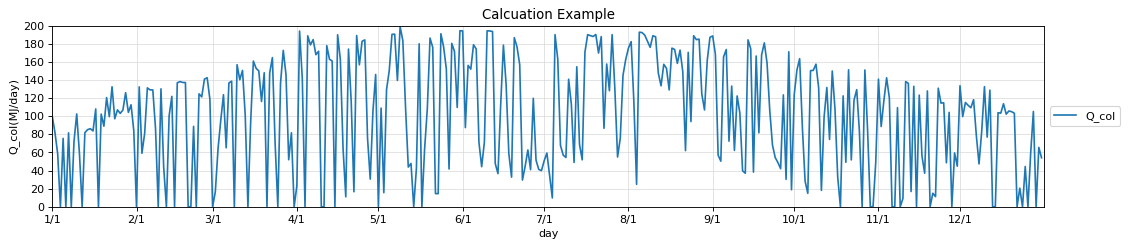

In [56]:
plt.figure(figsize = (16, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('Calcuation Example')

x_values = [x for x in range(0, 365, 1)]
y_values = [get_daily_Q_col(spec, day) for day in EC.get_Annual_Days()]

plt.plot(x_values, y_values, label='Q_col',)
        
ax=plt.gca()
ax.set_xlabel('day')
ax.set_xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334])
ax.set_xticklabels(['1/1', '2/1', '3/1', '4/1', '5/1', '6/1', '7/1', '8/1', '9/1', '10/1', '11/1', '12/1'], minor=False)
ax.set_xbound(lower=0, upper=365)

ax.set_ylabel('Q_col(MJ/day)')
ax.set_yticks([y for y in range(0, 210, 20)], minor=False)
ax.set_ybound(lower=0, upper=200)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True)

plt.show()

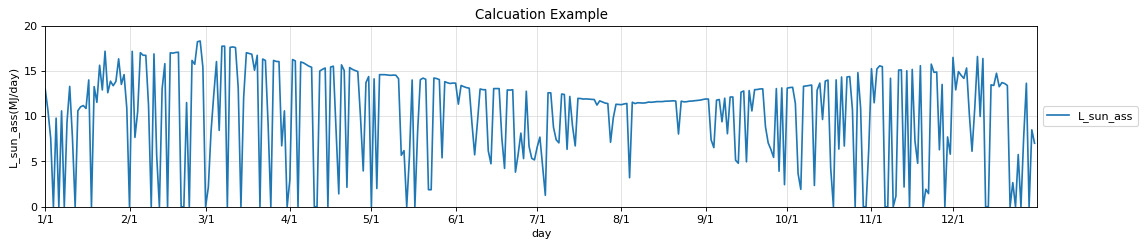

In [57]:
plt.figure(figsize = (16, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('Calcuation Example')

x_values = [x for x in range(0, 365, 1)]
y_values = [get_daily_L_sun_ass(spec, get_daily_Q_d(spec, day), day) for day in EC.get_Annual_Days()]

plt.plot(x_values, y_values, label='L_sun_ass',)

ax=plt.gca()
ax.set_xlabel('day')
ax.set_xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334])
ax.set_xticklabels(['1/1', '2/1', '3/1', '4/1', '5/1', '6/1', '7/1', '8/1', '9/1', '10/1', '11/1', '12/1'], minor=False)
ax.set_xbound(lower=0, upper=365)

ax.set_ylabel('L_sun_ass(MJ/day)')
ax.set_yticks([y for y in range(0, 25, 5)], minor=False)
ax.set_ybound(lower=0, upper=20)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True)

plt.show()

In [58]:
annal_E_E_acc_aux_W = sum([get_daily_E_E(spec, day) for day in EC.get_Annual_Days()])
print('Power consumption of auxiliary machinery : ' + str(annal_E_E_acc_aux_W) + ' kWh/year')

Power consumption of auxiliary machinery : 883.4264000000016 kWh/year


In [59]:
annal_Q_d = sum([get_daily_Q_d(spec, day) for day in EC.get_Annual_Days()]) /1000
print('Annal amount of heat collected by the solar heat collector : ' + str(annal_Q_d) + ' GJ/year')

Annal amount of heat collected by the solar heat collector : 4.8109263127944235 GJ/year


In [60]:
annal_L_sun_ass = sum([get_daily_L_sun_ass(spec, get_daily_Q_d(spec, day), day) for day in EC.get_Annual_Days()]) /1000
print('Annal hot water load after substracting amount of heat collected by the solar heat collector : ' + str(annal_L_sun_ass) + ' GJ/year')

Annal hot water load after substracting amount of heat collected by the solar heat collector : 3.7299087468099357 GJ/year


In [61]:
annal_HW_Load = sum([sum([get_HW_Laods(day)[i] for i in range(0,6)]) for day in EC.get_Annual_Days()]) /1000
print('Annal hot water load : ' + str(annal_HW_Load) + ' GJ/year')

Annal hot water load : 16.918565837785998 GJ/year


In [62]:
print('Redution ratio : ' + str(annal_L_sun_ass/annal_HW_Load*100) + ' %')

Redution ratio : 22.046246606077812 %
